# ---------------------------------------------------------------
    Springboard Data Science Career Track - March 2 Cohort

    Date:  2020-05-24

    By: Justin Huang	

    Advisor: Blake Arensdorf
# ---------------------------------------------------------------

# Capstone Project 1: Data Story

How do you create a data story? 
You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 

Steps:
Ask the following questions and look for the answers using code and plots:
- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

Looking at the plots, what are some insights you can make?

Do you see any correlations? 

Is there a hypothesis you’d like to investigate further? 

What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. 
Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 
What are some other trends/relationships you think will make the story more complete?


Submission: 
Submit links to a GitHub repository containing a Jupyter Notebook. The Notebook should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

You will be evaluated using this rubric.

These results will go into your final portfolio and presentation. Organize your work as you go along to make it easier to compile later. Create slides and/or a presentation (.ppt) about your emerging data story.   
 
In case the dataset is too large to commit to GitHub, please include a link to the dataset inside the Jupyter Notebook.

Discuss these results with your mentor at the next call. if you’re having trouble with your code for this unit, you can reach out to your course TA for help by emailing projects@springboard.com, or post questions in the community forum.

# ============================

# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================

# Load Clean Data Files
(From Unit 5 Exercises)

In [4]:
teams_df = pd.read_csv('clean/teams_clean.csv')

In [5]:
games_df = pd.read_csv('clean/games_clean.csv')

# ============================

# My own notes/ideas:

- trends over time: offensive and defensive, and those stats against teams win percentage
- focus on trends with champions?
- 

# ============================

# Preparing a new dataframe of grain "Individual Team Game"
It was realized that the original dataframe had the grain on the game whereby each game had 2 teams.
In order to carry out further analysis, the grain of the dataframe must change: to be an "individual team game"

Below are the data wrangling steps carried out to prepare this new dataframe.

In [6]:
home_team_cols = [
    'GAME_DATE_EST',
    'GAME_ID',
    'HOME_TEAM_ID',
    'SEASON',
    'PTS_home',
    'FG_PCT_home',
    'FT_PCT_home',
    'FG3_PCT_home',
    'AST_home',
    'REB_home',
    'HOME_TEAM_WINS',
    'dt_MONTH',
    'dt_YEAR',
    'HOME_TEAM_ABBR',
    'HOME_TEAM_CITY',
    'HOME_TEAM_NICKNAME',
    'GAME_TYPE_CODE',
    'GAME_TYPE'
]

indv_games_home_team_df = games_df.loc[:, home_team_cols]

# this notation "decouples" the copy from the original and supresses any downstream warnings about copy
# but if i don't do this, then i get the annoying copy warning
# discuss this with blake

# https://stackoverflow.com/questions/41274332/pandas-creating-a-new-column

In [7]:
# add a column with hardcoded value to indicate home team.

# confused bc this code below always gives a "setting with copy warning"
# indv_games_home_team_df['HomeAway'] = 'Home'

indv_games_home_team_df.loc[:,'HomeAway'] = 'Home'


In [8]:
away_team_cols = [
    'GAME_DATE_EST',
    'GAME_ID',
    'HOME_TEAM_ID',
    'SEASON',
    'PTS_away',
    'FG_PCT_away',
    'FT_PCT_away',
    'FG3_PCT_away',
    'AST_away',
    'REB_away',
    'HOME_TEAM_WINS',
    'dt_MONTH',
    'dt_YEAR',
    'VISITOR_TEAM_ABBR',
    'VISITOR_TEAM_CITY',
    'VISITOR_TEAM_NICKNAME',
    'GAME_TYPE_CODE',
    'GAME_TYPE'
]
indv_games_away_team_df = games_df.loc[:,away_team_cols]

In [9]:
# add a column with hardcoded value to indicate *Away* team.
indv_games_away_team_df['HomeAway'] = 'Away'

In [10]:
indv_games_away_team_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,SEASON,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,dt_MONTH,dt_YEAR,VISITOR_TEAM_ABBR,VISITOR_TEAM_CITY,VISITOR_TEAM_NICKNAME,GAME_TYPE_CODE,GAME_TYPE,HomeAway
0,2020-03-01,21900895,1610612766,2019,93.0,0.402,0.762,0.226,20.0,61.0,0,3,2020,MIL,Milwaukee,Bucks,2,Regular Season,Away
1,2020-03-01,21900896,1610612750,2019,111.0,0.468,0.632,0.275,28.0,56.0,0,3,2020,DAL,Dallas,Mavericks,2,Regular Season,Away
2,2020-03-01,21900897,1610612746,2019,130.0,0.505,0.650,0.488,27.0,37.0,1,3,2020,PHI,Philadelphia,76ers,2,Regular Season,Away
3,2020-03-01,21900898,1610612743,2019,118.0,0.461,0.897,0.263,24.0,36.0,1,3,2020,TOR,Toronto,Raptors,2,Regular Season,Away
4,2020-03-01,21900899,1610612758,2019,100.0,0.413,0.667,0.429,23.0,42.0,1,3,2020,DET,Detroit,Pistons,2,Regular Season,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21629,2014-10-29,21400014,1610612758,2014,95.0,0.440,0.719,0.222,21.0,44.0,0,10,2014,GSW,Golden State,Warriors,2,Regular Season,Away
21630,2014-10-29,21400015,1610612757,2014,89.0,0.407,0.808,0.125,19.0,43.0,1,10,2014,OKC,Oklahoma City,Thunder,2,Regular Season,Away
21631,2014-10-28,21400001,1610612740,2014,84.0,0.381,0.762,0.364,17.0,56.0,1,10,2014,ORL,Orlando,Magic,2,Regular Season,Away
21632,2014-10-28,21400002,1610612759,2014,100.0,0.487,0.842,0.381,17.0,33.0,1,10,2014,DAL,Dallas,Mavericks,2,Regular Season,Away


In [11]:
indv_games_away_team_df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'SEASON', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'dt_MONTH', 'dt_YEAR', 'VISITOR_TEAM_ABBR',
       'VISITOR_TEAM_CITY', 'VISITOR_TEAM_NICKNAME', 'GAME_TYPE_CODE',
       'GAME_TYPE', 'HomeAway'],
      dtype='object')

In [12]:
# I need to make a new dataframe with a grain of individual team games
# aka a vertical concat

# indv_games_home_team_df
# indv_games_away_team_df

#first rename the columns so that they are the same.
#then do the concat

indv_games_away_team_df.columns=indv_games_home_team_df.columns
indv_team_games_df = pd.concat([indv_games_home_team_df, indv_games_away_team_df], ignore_index=True)


In [13]:
# finally, rename the columns so they are in the context of individual team games:
new_col_names=[
    'GAME_DATE_EST', 
    'GAME_ID', 
    'TEAM_ID', 
    'SEASON', 
    'PTS',
    'FG_PCT', 
    'FT_PCT', 
    'FG3_PCT', 
    'AST', 
    'REB',
    'HOME_TEAM_WINS', 
    'dt_MONTH', 
    'dt_YEAR', 
    'TEAM_ABBR',
    'TEAM_CITY', 
    'TEAM_NICKNAME', 
    'GAME_TYPE_CODE', 
    'GAME_TYPE',
    'HomeAway'    
]
indv_team_games_df.columns = new_col_names

In [14]:
indv_team_games_df.head()

,GAME_DATE_EST,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,HOME_TEAM_WINS,dt_MONTH,dt_YEAR,TEAM_ABBR,TEAM_CITY,TEAM_NICKNAME,GAME_TYPE_CODE,GAME_TYPE,HomeAway
0,2020-03-01,21900895,1610612766,2019,85.0,0.354,0.900,0.229,22.0,47.0,0,3,2020,CHA,Charlotte,Hornets,2,Regular Season,Home
1,2020-03-01,21900896,1610612750,2019,91.0,0.364,0.400,0.310,19.0,57.0,0,3,2020,MIN,Minnesota,Timberwolves,2,Regular Season,Home
2,2020-03-01,21900897,1610612746,2019,136.0,0.592,0.805,0.542,25.0,37.0,1,3,2020,LAC,Los Angeles,Clippers,2,Regular Season,Home
3,2020-03-01,21900898,1610612743,2019,133.0,0.566,0.700,0.500,38.0,41.0,1,3,2020,DEN,Denver,Nuggets,2,Regular Season,Home
4,2020-03-01,21900899,1610612758,2019,106.0,0.407,0.885,0.257,18.0,51.0,1,3,2020,SAC,Sacramento,Kings,2,Regular Season,Home


In [15]:
# New column
# IsHomeTeam: 1 or 0

indv_team_games_df['IsHomeTeam'] = indv_team_games_df['HomeAway'].apply(
    lambda x: 1 if x == 'Home' else 0
)

In [16]:
# New column
# IsWinner: 1 or 0

#def a custom function
def IsWinnerYesNo(hometeamwins, ishometeam):
    if hometeamwins == 1 and ishometeam == 1:
        return 1
    elif hometeamwins == 0 and ishometeam == 0:
        return 1
    else:
        return 0
    


#apply it with lambda

indv_team_games_df['IsWinner'] = indv_team_games_df.apply(
    lambda x: 
    IsWinnerYesNo(x.HOME_TEAM_WINS, x.IsHomeTeam),    
    axis = 1    
)

In [17]:
#indv_team_games_df.to_csv('output.csv')

In [44]:
# add a column to sum on to count each game
indv_team_games_df['GAMES'] = 1

In [45]:
indv_team_games_df

,GAME_DATE_EST,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,...,TEAM_ABBR,TEAM_CITY,TEAM_NICKNAME,GAME_TYPE_CODE,GAME_TYPE,HomeAway,IsHomeTeam,WINS,GamesPlayed,GAMES
0,2020-03-01,21900895,1610612766,2019,85.0,0.354,0.900,0.229,22.0,47.0,...,CHA,Charlotte,Hornets,2,Regular Season,Home,1,0,1,1
1,2020-03-01,21900896,1610612750,2019,91.0,0.364,0.400,0.310,19.0,57.0,...,MIN,Minnesota,Timberwolves,2,Regular Season,Home,1,0,1,1
2,2020-03-01,21900897,1610612746,2019,136.0,0.592,0.805,0.542,25.0,37.0,...,LAC,Los Angeles,Clippers,2,Regular Season,Home,1,1,1,1
3,2020-03-01,21900898,1610612743,2019,133.0,0.566,0.700,0.500,38.0,41.0,...,DEN,Denver,Nuggets,2,Regular Season,Home,1,1,1,1
4,2020-03-01,21900899,1610612758,2019,106.0,0.407,0.885,0.257,18.0,51.0,...,SAC,Sacramento,Kings,2,Regular Season,Home,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43263,2014-10-29,21400014,1610612758,2014,95.0,0.440,0.719,0.222,21.0,44.0,...,GSW,Golden State,Warriors,2,Regular Season,Away,0,1,1,1
43264,2014-10-29,21400015,1610612757,2014,89.0,0.407,0.808,0.125,19.0,43.0,...,OKC,Oklahoma City,Thunder,2,Regular Season,Away,0,0,1,1
43265,2014-10-28,21400001,1610612740,2014,84.0,0.381,0.762,0.364,17.0,56.0,...,ORL,Orlando,Magic,2,Regular Season,Away,0,0,1,1
43266,2014-10-28,21400002,1610612759,2014,100.0,0.487,0.842,0.381,17.0,33.0,...,DAL,Dallas,Mavericks,2,Regular Season,Away,0,0,1,1


In [19]:
# spot checking the new dataframe

# https://watch.nba.com/game/20200301/PHILAC
indv_team_games_df.query('GAME_ID == 21900897')

# this infact is the correct data!

,GAME_DATE_EST,GAME_ID,TEAM_ID,SEASON,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,...,dt_MONTH,dt_YEAR,TEAM_ABBR,TEAM_CITY,TEAM_NICKNAME,GAME_TYPE_CODE,GAME_TYPE,HomeAway,IsHomeTeam,IsWinner
2,2020-03-01,21900897,1610612746,2019,136.0,0.592,0.805,0.542,25.0,37.0,...,3,2020,LAC,Los Angeles,Clippers,2,Regular Season,Home,1,1
21636,2020-03-01,21900897,1610612746,2019,130.0,0.505,0.650,0.488,27.0,37.0,...,3,2020,PHI,Philadelphia,76ers,2,Regular Season,Away,0,0


# ============================

# New Dataframe is Ready for use
indv_team_games_df

In [20]:
indv_team_games_df.rename(columns={'IsWinner':'WINS'}, inplace=True)

In [46]:
StatsForSum = ['PTS', 'AST', 'REB', 'WINS', 'GAMES']
StatsNoAgg = ['FG_PCT', 'FT_PCT', 'FG3_PCT']

In [47]:
# Which Teams Win the most in the Regular Season? Post Season?

RegSeasonWinners = indv_team_games_df.query("WINS == 1 and GAME_TYPE == 'Regular Season'")
PostSeasonWinners = indv_team_games_df.query("WINS == 1 and GAME_TYPE == 'Post Season'")

# Aggregated Stats

# ============================

In [48]:
RegSeason = indv_team_games_df.query("GAME_TYPE == 'Regular Season'")
RegSeasonSum = RegSeason[['TEAM_ABBR'] + StatsForSum].groupby('TEAM_ABBR').sum()
RegSeasonSum


,PTS,AST,REB,WINS,GAMES
TEAM_ABBR,,,,,
ATL,135768.0,30732.0,56555.0,623,1358
BKN,133227.0,29765.0,56746.0,573,1355
BOS,136617.0,30926.0,56401.0,763,1354
CHA,124931.0,27331.0,53241.0,506,1274
CHI,133830.0,30129.0,59779.0,682,1356
CLE,136010.0,29033.0,58288.0,693,1356
DAL,139207.0,29898.0,57722.0,795,1357
DEN,142888.0,32011.0,59232.0,763,1356
DET,133004.0,29059.0,57910.0,676,1358


In [49]:
PostSeason = indv_team_games_df.query("GAME_TYPE == 'Post Season'")
PostSeasonSum = PostSeason[['TEAM_ABBR'] + StatsForSum].groupby('TEAM_ABBR').sum()
PostSeasonSum

,PTS,AST,REB,WINS,GAMES
TEAM_ABBR,,,,,
ATL,8431.0,1784.0,3705.0,38,92
BKN,6452.0,1414.0,2762.0,29,68
BOS,15896.0,3546.0,6750.0,86,166
CHA,1342.0,255.0,563.0,3,15
CHI,8642.0,1858.0,3947.0,39,91
CLE,15085.0,2948.0,6468.0,97,152
DAL,10956.0,2005.0,4634.0,52,110
DEN,7881.0,1619.0,3340.0,29,78
DET,10011.0,2211.0,4505.0,61,111


[Text(0, 0.5, 'WINS'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'NBA Regular Season Wins by Team 2003/04 to 2019/20')]

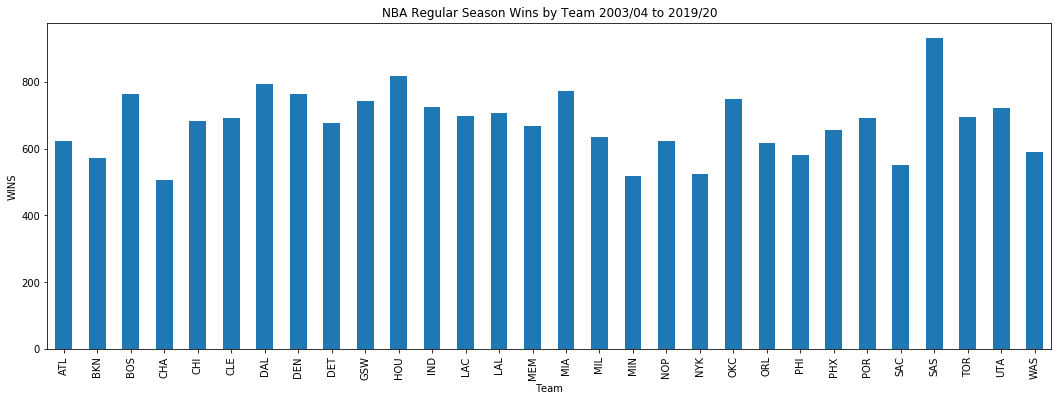

In [51]:
ax = RegSeasonSum['WINS'].plot(kind='bar', figsize=(18,6))
ax.set(xlabel="Team", ylabel='WINS', Title = 'NBA Regular Season Wins by Team 2003/04 to 2019/20')

[Text(0, 0.5, 'WINS'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'NBA Post Season Wins by Team 2003/04 to 2019/20')]

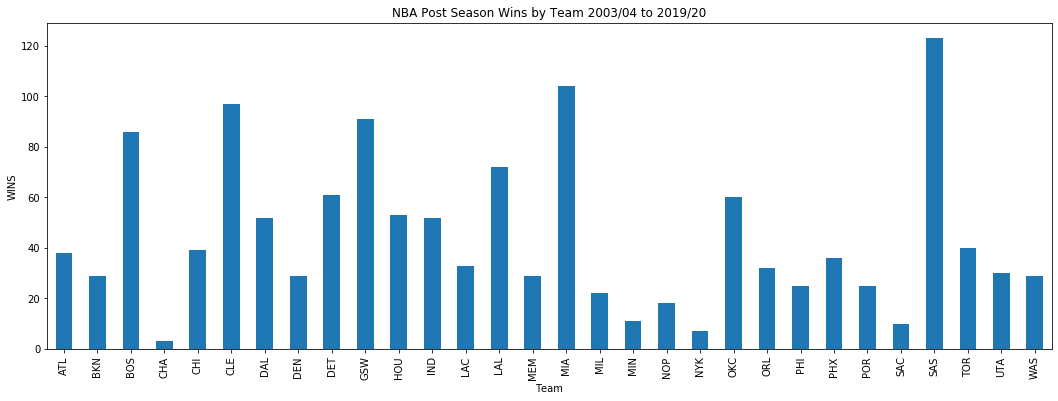

In [27]:
ax = PostSeasonSum['WINS'].plot(kind='bar', figsize=(18,6))
ax.set(xlabel="Team", ylabel='WINS', Title = 'NBA Post Season Wins by Team 2003/04 to 2019/20')

In [52]:
#wins over time per team
#reb/ast/pts over time league total AND per team

RegSeasonTeamSeason = RegSeason[['TEAM_ABBR', 'SEASON'] + StatsForSum].groupby(['TEAM_ABBR', 'SEASON']).sum()
RegSeasonTeamSeason

PTS     AST     REB  WINS  GAMES
TEAM_ABBR SEASON                                     
ATL       2003    7611.0  1648.0  3503.0    28     82
          2004    7605.0  1614.0  3435.0    13     82
          2005    7972.0  1625.0  3301.0    26     82
          2006    7680.0  1573.0  3288.0    30     82
          2007    8054.0  1804.0  3462.0    37     82
...                  ...     ...     ...   ...    ...
WAS       2015    8534.0  2005.0  3431.0    41     82
          2016    8953.0  1956.0  3514.0    49     82
          2017    8742.0  2065.0  3536.0    43     82
          2018    9350.0  2154.0  3473.0    32     82
          2019    6840.0  1500.0  2485.0    22     59

[509 rows x 5 columns]

In [72]:
# I create a per game statistic to account for the outliers 
# (lockout 2011 and covid 2019 since these seasons had less than 82 games)

RegSeasonTeamSeason['PTS_per_Game'] = RegSeasonTeamSeason['PTS'] / RegSeasonTeamSeason['GAMES']
RegSeasonTeamSeason['AST_per_Game'] = RegSeasonTeamSeason['AST'] / RegSeasonTeamSeason['GAMES']
RegSeasonTeamSeason['REB_per_Game'] = RegSeasonTeamSeason['REB'] / RegSeasonTeamSeason['GAMES']
RegSeasonTeamSeason['WIN_pct'] = RegSeasonTeamSeason['WINS'] / RegSeasonTeamSeason['GAMES']

In [56]:
RegSeasonTeamSeason

PTS     AST     REB  WINS  GAMES  PTS_per_Game  \
TEAM_ABBR SEASON                                                      
ATL       2003    7611.0  1648.0  3503.0    28     82     92.817073   
          2004    7605.0  1614.0  3435.0    13     82     92.743902   
          2005    7972.0  1625.0  3301.0    26     82     97.219512   
          2006    7680.0  1573.0  3288.0    30     82     93.658537   
          2007    8054.0  1804.0  3462.0    37     82     98.219512   
...                  ...     ...     ...   ...    ...           ...   
WAS       2015    8534.0  2005.0  3431.0    41     82    104.073171   
          2016    8953.0  1956.0  3514.0    49     82    109.182927   
          2017    8742.0  2065.0  3536.0    43     82    106.609756   
          2018    9350.0  2154.0  3473.0    32     82    114.024390   
          2019    6840.0  1500.0  2485.0    22     59    115.932203   

                  AST_per_Game  REB_per_Game  
TEAM_ABBR SEASON                              
ATL       2003       20.097561     42.719512  
          2004       19.682927     41.890244  
          2005       19.817073     40.256098  
          2006       19.182927     40.097561  
          2007       22.000000     42.219512  
...                        ...           ...  
WAS       2015       24.451220     41.841463  
          2016       23.853659     42.853659  
          2017       25.182927     43.121951  
          2018       26.268293     42.353659  
          2019       25.423729     42.118644  

[509 rows x 8 columns]

In [221]:
# next, get a list of unique team names
# teams = sorted(indv_team_games_df['TEAM_ABBR'].unique())
# teams_df
teams = sorted(teams_df['ABBREVIATION'])

In [189]:
teams

['ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS']

In [190]:
forplotting = ['PTS_per_Game', 'AST_per_Game', 'REB_per_Game', 'WIN_pct']

# RegSeasonTeamSeason[forplotting].loc['TOR']
RegSeasonTeamSeason[forplotting].columns.values


array(['PTS_per_Game', 'AST_per_Game', 'REB_per_Game', 'WIN_pct'],
      dtype=object)

In [95]:
# double checking that this is the desired dataframe

RegSeasonTeamSeason[forplotting]

PTS_per_Game  AST_per_Game  REB_per_Game   WIN_pct
TEAM_ABBR SEASON                                                    
ATL       2003       92.817073     20.097561     42.719512  0.341463
          2004       92.743902     19.682927     41.890244  0.158537
          2005       97.219512     19.817073     40.256098  0.317073
          2006       93.658537     19.182927     40.097561  0.365854
          2007       98.219512     22.000000     42.219512  0.451220
...                        ...           ...           ...       ...
WAS       2015      104.073171     24.451220     41.841463  0.500000
          2016      109.182927     23.853659     42.853659  0.597561
          2017      106.609756     25.182927     43.121951  0.524390
          2018      114.024390     26.268293     42.353659  0.390244
          2019      115.932203     25.423729     42.118644  0.372881

[509 rows x 4 columns]

In [202]:
# assign the plotting dataframe to a new dataframe, df (so that the code is less wordy)

df = pd.DataFrame()
df = RegSeasonTeamSeason[forplotting]

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='SEASON')

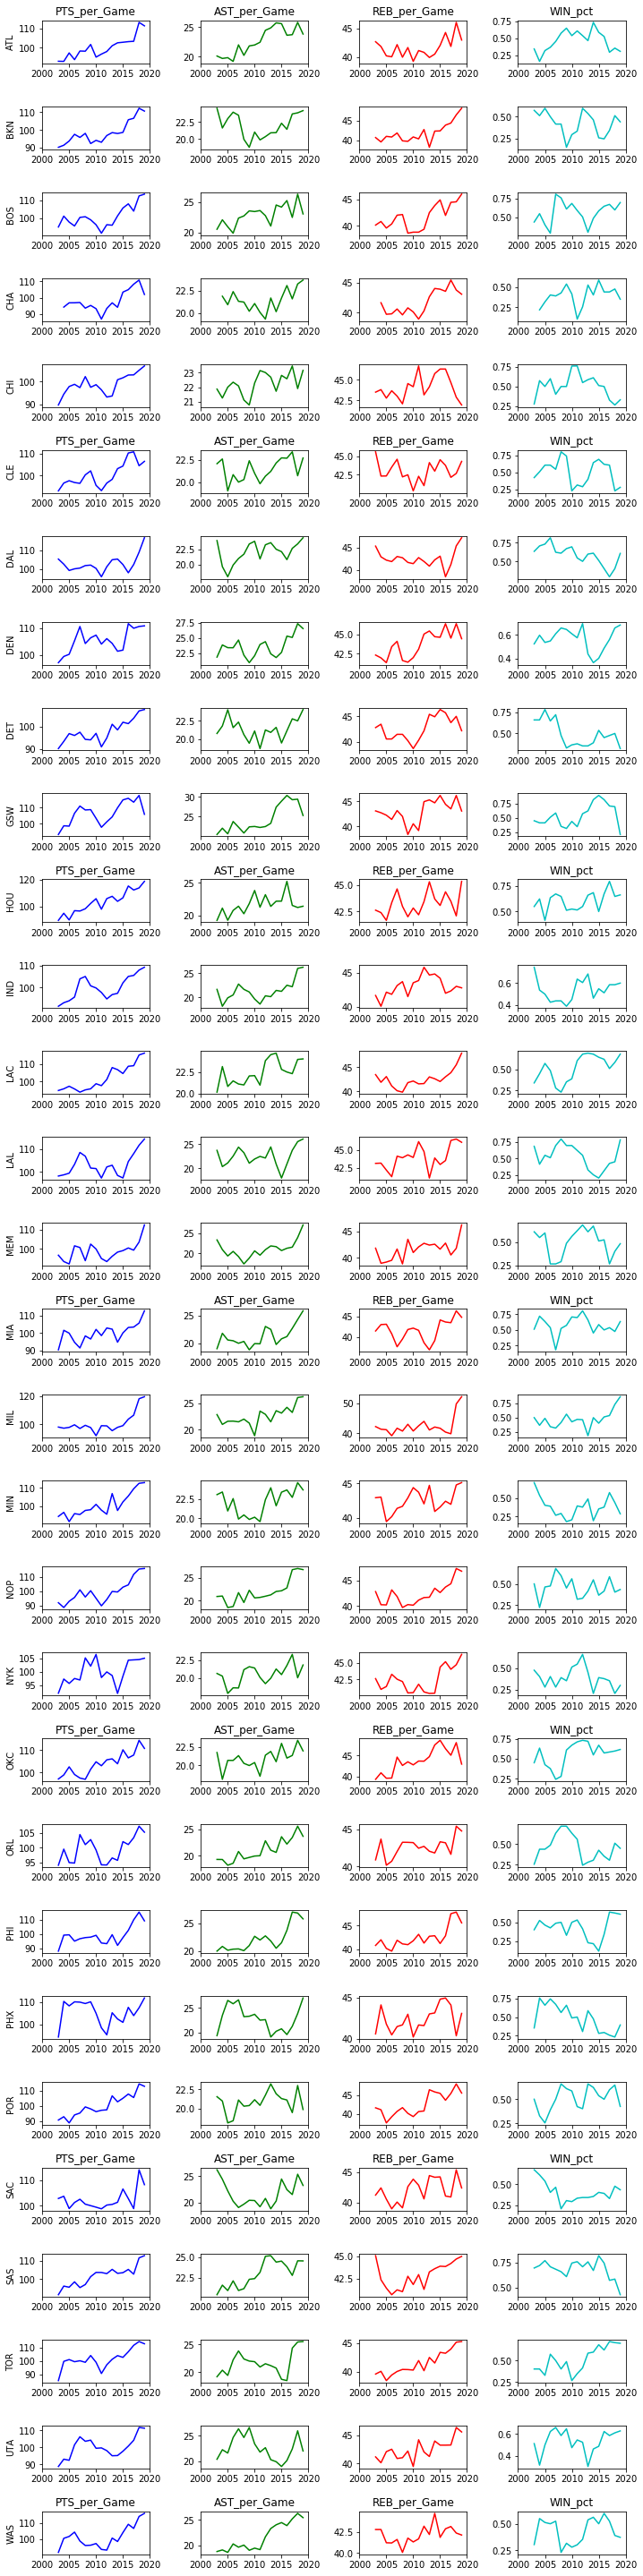

In [218]:
# next we will us nested loops to plot over time the stats for each team.

# list of colours for each stat
colours = ['b','g','r','c']

fig, axes = plt.subplots(
    nrows=len(teams), 
    ncols=len(forplotting),
    figsize=(10,40)
)

for num, team in enumerate(teams):
    # y axis label: put the team name only in the first column
    axes[num, 0].set_ylabel(team)

    for (idx, feature), colour in zip(enumerate(forplotting), colours):
        axes[num, idx].plot(df.loc[team].index, df.loc[team][feature], colour)
        axes[num, idx].set_xlim(2000, 2020)
        
        # label the title at the top, bottom, and throughtout the figure to aid readers.
        if (num == 0) or (num+1 == len(teams)) or (num % 5 == 0):
            axes[num, idx].set_title(feature)
        
plt.tight_layout(pad=0.8, w_pad=1.5, h_pad=1.5)

plt.show()

# 2) Non-Aggregated Stats

These percentage stats were provided in the original kaggle dataset as-is 

(without the underlying numerator and denomonator values) so we are unable to combine them and calculate say the total average for a given season.

for example, you should never take a average of a percentage. or an average of an average. etc.

Instead, we will attempt to visualize these stats on a box plot to show the trend over time, if any.

# ============================

In [255]:
RegSeasonNoAgg = RegSeason[['TEAM_ABBR', 'SEASON', 'GAME_DATE_EST'] + StatsNoAgg]
RegSeasonNoAgg

,TEAM_ABBR,SEASON,GAME_DATE_EST,FG_PCT,FT_PCT,FG3_PCT
0,CHA,2019,2020-03-01,0.354,0.900,0.229
1,MIN,2019,2020-03-01,0.364,0.400,0.310
2,LAC,2019,2020-03-01,0.592,0.805,0.542
3,DEN,2019,2020-03-01,0.566,0.700,0.500
4,SAC,2019,2020-03-01,0.407,0.885,0.257
...,...,...,...,...,...,...
43263,GSW,2014,2014-10-29,0.440,0.719,0.222
43264,OKC,2014,2014-10-29,0.407,0.808,0.125
43265,ORL,2014,2014-10-28,0.381,0.762,0.364
43266,DAL,2014,2014-10-28,0.487,0.842,0.381


In [256]:
df2 = RegSeasonNoAgg
df2 = df2.rename(columns={'TEAM_ABBR':'TEAM'})

df2

,TEAM,SEASON,GAME_DATE_EST,FG_PCT,FT_PCT,FG3_PCT
0,CHA,2019,2020-03-01,0.354,0.900,0.229
1,MIN,2019,2020-03-01,0.364,0.400,0.310
2,LAC,2019,2020-03-01,0.592,0.805,0.542
3,DEN,2019,2020-03-01,0.566,0.700,0.500
4,SAC,2019,2020-03-01,0.407,0.885,0.257
...,...,...,...,...,...,...
43263,GSW,2014,2014-10-29,0.440,0.719,0.222
43264,OKC,2014,2014-10-29,0.407,0.808,0.125
43265,ORL,2014,2014-10-28,0.381,0.762,0.364
43266,DAL,2014,2014-10-28,0.487,0.842,0.381


In [ ]:
# preparing the dataframe for boxplots:
# columns are seasons
# 1 stat only
# 1 df per team



In [273]:
testing_df = pd.DataFrame()
testing_df = df2.query("TEAM == 'TOR'")[['SEASON','FG3_PCT', 'GAME_DATE_EST']]
testing_df.sort_values('GAME_DATE_EST', inplace=True)
testing_df

,SEASON,FG3_PCT,GAME_DATE_EST
14770,2003,0.167,2003-10-29
14754,2003,0.333,2003-10-31
36372,2003,0.375,2003-11-01
14713,2003,0.444,2003-11-06
36335,2003,0.125,2003-11-07
...,...,...,...
70,2019,0.378,2020-02-21
54,2019,0.386,2020-02-23
39,2019,0.346,2020-02-25
17,2019,0.233,2020-02-28


In [274]:
# now with the sorted dataframe add a game number, per season

testing_df['GAME_NO'] = testing_df.groupby(['SEASON']).cumcount()+1
testing_df



,SEASON,FG3_PCT,GAME_DATE_EST,GAME_NO
14770,2003,0.167,2003-10-29,1
14754,2003,0.333,2003-10-31,2
36372,2003,0.375,2003-11-01,3
14713,2003,0.444,2003-11-06,4
36335,2003,0.125,2003-11-07,5
...,...,...,...,...
70,2019,0.378,2020-02-21,56
54,2019,0.386,2020-02-23,57
39,2019,0.346,2020-02-25,58
17,2019,0.233,2020-02-28,59


In [276]:
box_df = pd.DataFrame()
box_df = testing_df.pivot(index='GAME_NO',columns='SEASON',values='FG3_PCT')
box_df

SEASON,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GAME_NO,,,,,,,,,,,,,,,,,
1,0.167,0.333,0.346,0.200,0.563,0.625,0.313,0.300,0.429,0.353,0.294,0.308,0.389,0.167,0.448,0.424,0.350
2,0.333,0.350,0.375,0.429,0.591,0.500,0.318,0.300,0.400,0.389,0.304,0.190,0.423,0.250,0.295,0.371,0.500
3,0.375,0.500,0.250,0.385,0.400,0.500,0.588,0.429,0.429,0.476,0.304,0.250,0.440,0.250,0.270,0.345,0.357
4,0.444,0.217,0.125,0.368,0.471,0.400,0.333,0.231,0.385,0.233,0.286,0.258,0.294,0.400,0.235,0.385,0.256
5,0.125,0.333,0.333,0.474,0.300,0.444,0.483,0.385,0.412,0.227,0.438,0.438,0.357,0.240,0.241,0.344,0.481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.471,0.412,0.500,0.440,0.375,0.200,0.353,0.294,NaN,0.389,0.480,0.444,0.381,0.217,0.303,0.514,NaN
79,0.188,0.350,0.533,0.353,0.438,0.364,0.133,0.357,NaN,0.250,0.455,0.300,0.455,0.333,0.300,0.395,NaN
80,0.111,0.167,0.389,0.214,0.188,0.308,0.238,0.167,NaN,0.400,0.391,0.346,0.350,0.450,0.425,0.346,NaN


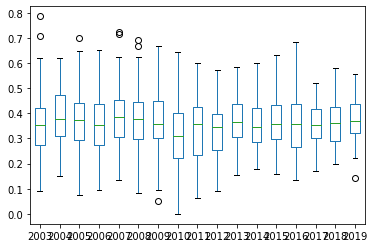

In [277]:
box_df.plot(kind='box')

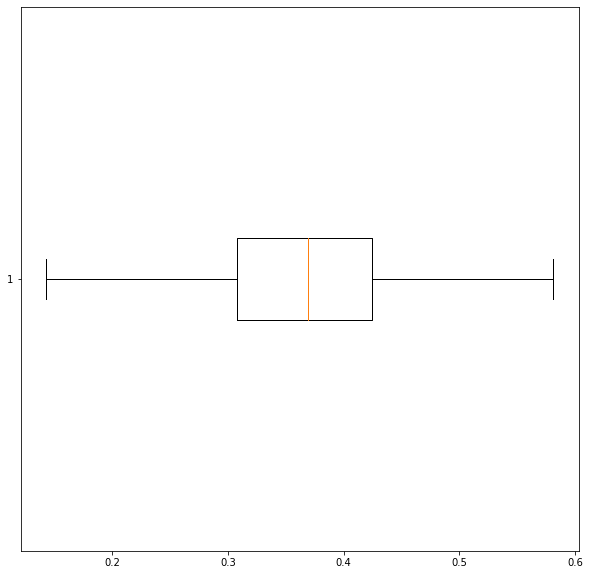

In [246]:
# create a figure instance
fig = plt.figure(num=1, figsize=(10,10))

# create an axes instance
ax = fig.add_subplot(111)

# create the boxplot
bp = ax.boxplot(testing_plot['FG3_PCT'], vert=False)

# save

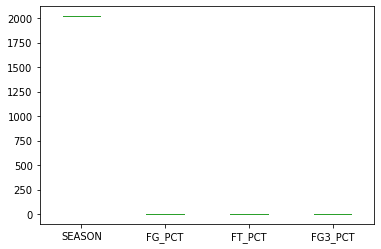

In [247]:
testing_plot.plot(kind = 'box')

# Appendix / Scrap
(ignore the below for grading purposes)

# ============================

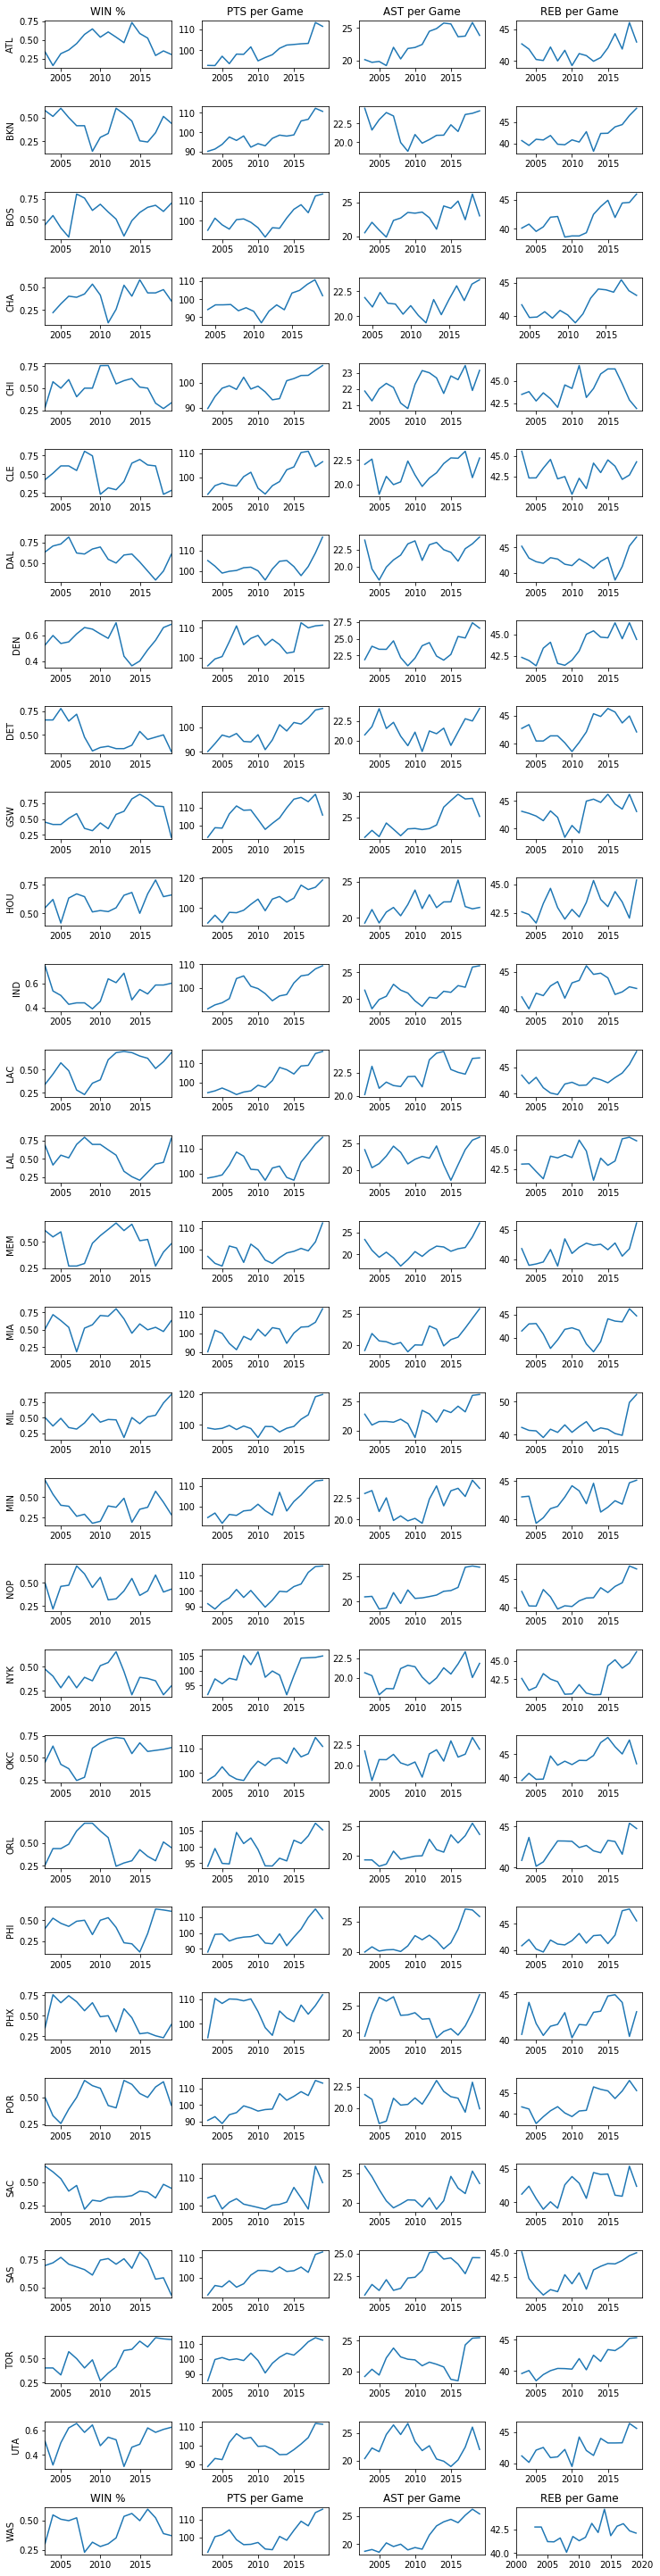

In [203]:
fig, axes = plt.subplots(
    nrows=len(teams), 
    ncols=len(forplotting),
    figsize=(10,40)
)

# set titles at the top
axes[0, 0].set_title('WIN %')    
axes[0, 1].set_title('PTS per Game')
axes[0, 2].set_title('AST per Game')
axes[0, 3].set_title('REB per Game')

# set titles at the bottom
axes[len(teams)-1, 0].set_title('WIN %')    
axes[len(teams)-1, 1].set_title('PTS per Game')
axes[len(teams)-1, 2].set_title('AST per Game')
axes[len(teams)-1, 3].set_title('REB per Game')

for team, num in zip(teams, range(len(teams))):
    
    axes[num, 0].plot(df.loc[team].index, df.loc[team].WIN_pct)    
    axes[num, 1].plot(df.loc[team].index, df.loc[team].PTS_per_Game)
    axes[num, 2].plot(df.loc[team].index, df.loc[team].AST_per_Game)
    axes[num, 3].plot(df.loc[team].index, df.loc[team].REB_per_Game)
    
    # y axis label: put the team name only in the first column
    axes[num, 0].set_ylabel(team)
    
    axes[num, 0].set_xlim(2003, 2019)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000150D5EF28C8>,
      dtype=object)

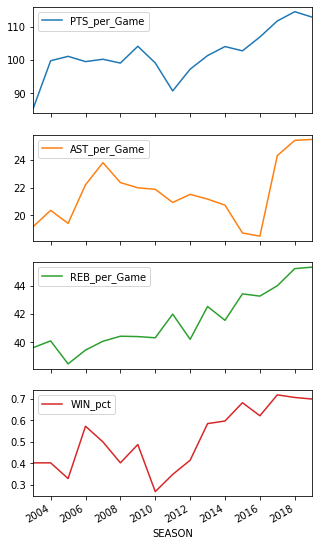

In [79]:
RegSeasonTeamSeason[forplotting].loc['TOR'].plot(kind='line', subplots=True, figsize=(5,10))

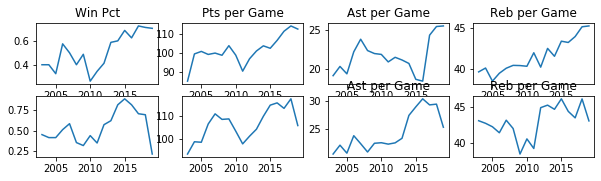

In [162]:

fig = plt.figure(figsize=(10,40))

plt.subplot(30,4,1)
plt.plot(RegSeasonTeamSeason[forplotting].loc['TOR'].index, RegSeasonTeamSeason[forplotting].loc['TOR'].WIN_pct)
plt.title('Win Pct')

plt.subplot(30,4,2)
plt.plot(RegSeasonTeamSeason[forplotting].loc['TOR'].index, RegSeasonTeamSeason[forplotting].loc['TOR'].PTS_per_Game)
plt.title('Pts per Game')

plt.subplot(30,4,3)
plt.plot(RegSeasonTeamSeason[forplotting].loc['TOR'].index, RegSeasonTeamSeason[forplotting].loc['TOR'].AST_per_Game)
plt.title('Ast per Game')

plt.subplot(30,4,4)
plt.plot(RegSeasonTeamSeason[forplotting].loc['TOR'].index, RegSeasonTeamSeason[forplotting].loc['TOR'].REB_per_Game)
plt.title('Reb per Game')


plt.subplot(30,4,5)
plt.plot(RegSeasonTeamSeason[forplotting].loc['GSW'].index, RegSeasonTeamSeason[forplotting].loc['GSW'].WIN_pct)
#plt.title('Win Pct')

plt.subplot(30,4,6)
plt.plot(RegSeasonTeamSeason[forplotting].loc['GSW'].index, RegSeasonTeamSeason[forplotting].loc['GSW'].PTS_per_Game)
#plt.title('Pts per Game')

plt.subplot(30,4,7)
plt.plot(RegSeasonTeamSeason[forplotting].loc['GSW'].index, RegSeasonTeamSeason[forplotting].loc['GSW'].AST_per_Game)
plt.title('Ast per Game')

plt.subplot(30,4,8)
plt.plot(RegSeasonTeamSeason[forplotting].loc['GSW'].index, RegSeasonTeamSeason[forplotting].loc['GSW'].REB_per_Game)
plt.title('Reb per Game')

plt.show()

RegSeasonTeamSeason.plot(kind='line', subplots=True, grid=True, title="Sample Data (Unit)",
        layout=(30, 30), sharex=True, sharey=False, legend=True,    
        style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r']
        #,xticks=np.arange(0, len(RegSeasonTeamSeason), 16)
                        )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000150D58E4988>,
      dtype=object)

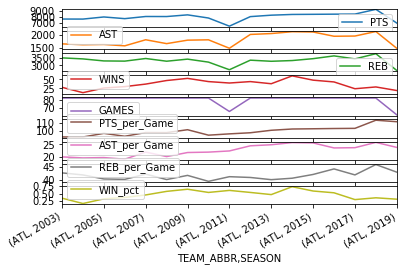

In [76]:
RegSeasonTeamSeason.query("TEAM_ABBR == 'ATL'").plot(kind='line', subplots=True)